In [48]:
import pandas as pd

df = pd.read_csv('../data/sea_all_years.csv')

In [49]:
import numpy as np

In [50]:
df = df.drop('Unnamed: 0', axis=1)

df = df.dropna(axis=0, subset=['ArrTime', 'ArrDelay', 'DepDelay', 'DepTime', 'ActualElapsedTime', 'CRSElapsedTime', 'Distance'])

# Datetime processing
dates = df.ix[:, ['Year', 'Month', 'DayofMonth']]
dates.columns = ['year', 'month', 'day']
dates = pd.to_datetime(dates, infer_datetime_format=True)
df['Date'] = dates

In [52]:
df.head(1).T

,0
ActualElapsedTime,147
AirTime,NaN
ArrDelay,-4
ArrTime,926
CRSArrTime,930
CRSDepTime,700
CRSElapsedTime,150
CancellationCode,NaN
Cancelled,0
CarrierDelay,NaN


In [160]:
# Select flights leaving Seattle
df_origin_sea = df.ix[df['Origin'] == 'SEA', :]

# Alaska Airlines indicator
df_origin_sea['Alaska'] = (df_origin_sea['UniqueCarrier'] == 'AS').astype(int)

# Limit to after 2008-12-01 to eliminate runway effects
df_origin_sea_3rwy = df_origin_sea.ix[df_origin_sea['Date'] > '2008-12-01', :]



carrier_dummies = pd.get_dummies(df_origin_sea_3rwy.ix[:, ['UniqueCarrier']])
week_dummies = pd.get_dummies(df_origin_sea_3rwy.ix[:, ['DayOfWeek']].astype(str))
month_dummies = pd.get_dummies(df_origin_sea_3rwy.ix[:, ['Month']].astype(str))

/Users/cf/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [61]:
carrier_dummies.head(1)

,UniqueCarrier_AA,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_NK,UniqueCarrier_NW,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_VX,UniqueCarrier_WN
3916022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [161]:
month_dummies.head(4)

,Month_1,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9
3916022,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3916023,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3916024,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3916025,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
# Get model
df_model = pd.concat((df_origin_sea_3rwy, carrier_dummies), axis=1)
df_model = pd.concat((df_model, week_dummies), axis=1)
df_model = pd.concat((df_model, month_dummies), axis=1)
# Test


In [64]:
df_origin_sea_3rwy.shape

(824705, 33)

In [163]:
df_model.shape

(824705, 67)

In [164]:
df_model.columns.values

array(['ActualElapsedTime', 'AirTime', 'ArrDelay', 'ArrTime', 'CRSArrTime',
       'CRSDepTime', 'CRSElapsedTime', 'CancellationCode', 'Cancelled',
       'CarrierDelay', 'DayOfWeek', 'DayofMonth', 'DepDelay', 'DepTime',
       'Dest', 'Distance', 'Diverted', 'FlightNum', 'LateAircraftDelay',
       'Month', 'NASDelay', 'Origin', 'SecurityDelay', 'TailNum', 'TaxiIn',
       'TaxiOut', 'UniqueCarrier', 'Unnamed: 0.1', 'Unnamed: 0.1',
       'WeatherDelay', 'Year', 'Date', 'Alaska', 'UniqueCarrier_AA',
       'UniqueCarrier_AS', 'UniqueCarrier_B6', 'UniqueCarrier_CO',
       'UniqueCarrier_DL', 'UniqueCarrier_F9', 'UniqueCarrier_FL',
       'UniqueCarrier_HA', 'UniqueCarrier_NK', 'UniqueCarrier_NW',
       'UniqueCarrier_OO', 'UniqueCarrier_UA', 'UniqueCarrier_US',
       'UniqueCarrier_VX', 'UniqueCarrier_WN', 'DayOfWeek_1',
       'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5',
       'DayOfWeek_6', 'DayOfWeek_7', 'Month_1', 'Month_10', 'Month_11',
       'Month_12', 'Month

In [23]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824705 entries, 3916022 to 5578481
Data columns (total 46 columns):
ActualElapsedTime    824705 non-null float64
AirTime              824705 non-null float64
ArrDelay             824705 non-null float64
ArrTime              824705 non-null float64
CRSArrTime           824705 non-null float64
CRSDepTime           824705 non-null float64
CRSElapsedTime       824705 non-null float64
CancellationCode     0 non-null object
Cancelled            824705 non-null float64
CarrierDelay         124582 non-null float64
DayOfWeek            824705 non-null int64
DayofMonth           824705 non-null int64
DepDelay             824705 non-null float64
DepTime              824705 non-null float64
Dest                 824705 non-null object
Distance             824705 non-null float64
Diverted             824705 non-null float64
FlightNum            824705 non-null int64
LateAircraftDelay    124582 non-null float64
Month                824705 non-null int

In [70]:
df_model['Delay_15_Indicator'] = (df_model['DepDelay'] >= 15).astype(int)

In [71]:
y = df_model.pop('Delay_15_Indicator')

In [165]:
cols_m1 =  ['AirTime', 
         'CRSDepTime', 
         'UniqueCarrier_AS',
         'UniqueCarrier_B6', 
         'UniqueCarrier_CO', 
         'UniqueCarrier_DL',
         'UniqueCarrier_F9', 
         'UniqueCarrier_FL', 
         'UniqueCarrier_HA',
         'UniqueCarrier_NK', 
         'UniqueCarrier_NW', 
         'UniqueCarrier_OO',
         'UniqueCarrier_UA', 
         'UniqueCarrier_US', 
         'UniqueCarrier_VX',
         'UniqueCarrier_WN', 
        'DayOfWeek_2', 
        'DayOfWeek_3', 
        'DayOfWeek_4', 
        'DayOfWeek_5',
        'DayOfWeek_6', 
        'DayOfWeek_7',
        'Month_10', 'Month_11','Month_12', 
        'Month_2', 'Month_3', 'Month_4', 
        'Month_5', 'Month_6','Month_7', 
        'Month_8', 'Month_9']

In [166]:
np.in1d(df_model.columns.values, cols_m1)

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True], dtype=bool)

In [167]:
X = df_model.ix[:, np.in1d(df_model.columns.values, cols_m1)]

In [168]:
X

,AirTime,CRSDepTime,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_NK,...,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9
3916022,137.0,700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3916023,135.0,1545.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3916024,219.0,1205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3916025,54.0,1215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3916026,56.0,2045.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3916027,55.0,615.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3916028,131.0,1740.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3916029,122.0,820.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3916030,130.0,1430.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3916031,35.0,1320.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
from sklearn.cross_validation import train_test_split

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [170]:
X_train.shape

(577293, 33)

In [171]:
X_test.shape

(247412, 33)

In [88]:
from sklearn.linear_model import LogisticRegression

In [172]:
lm1 = LogisticRegression(class_weight='balanced')

In [173]:
lm1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [174]:
lm1.coef_

array([[  6.14183561e-06,   5.85020731e-04,  -6.82035073e-01,
         -1.76387246e-02,  -2.40506367e-01,  -3.40768643e-01,
          2.64081292e-02,  -7.17457023e-01,  -6.33396501e-01,
          1.77946029e-01,  -2.77428754e-02,  -4.34601081e-01,
          1.85104482e-02,  -5.97154179e-01,   1.30441360e-01,
          2.03876407e-01,  -6.94607330e-02,  -8.04050829e-02,
          5.79373352e-02,   7.71528177e-02,  -1.09163248e-01,
         -4.45099257e-02,  -3.39225769e-01,  -1.82023574e-01,
          3.10726688e-01,  -2.29440532e-01,  -1.15980023e-01,
         -3.57903870e-01,  -4.02428505e-01,  -6.71143175e-03,
         -1.79596991e-02,  -6.06974866e-02,  -4.10362400e-01]])

In [175]:
y_pred = lm1.predict(X_test)
y_prob = lm1.predict_proba(X_test)

In [151]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [176]:
accuracy_score(y_test, y_pred)

0.6080667065461659

In [177]:
recall_score(y_test, y_pred)

0.58152773224450871

In [178]:
precision_score(y_test, y_pred)

0.1904724716907458

In [179]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
%matplotlib inline

In [180]:
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

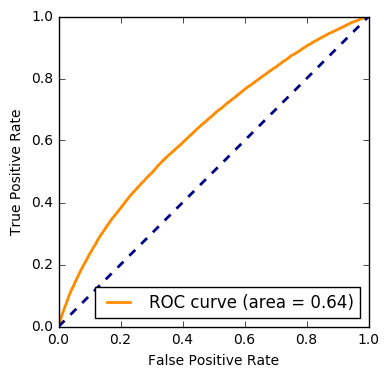

In [181]:
plt.figure(figsize=(4,4))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [159]:
lm1.intercept_

array([-0.44064857])